In [5]:
import pprint
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [7]:
keras.__version__

'2.4.0'

In [8]:
data = pd.read_csv('insurance.csv')
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
852,46,female,35.530,0,yes,northeast,42111.66470
155,44,male,39.520,0,no,northwest,6948.70080
52,48,male,28.000,1,yes,southwest,23568.27200
138,54,female,31.900,3,no,southeast,27322.73386
1145,52,male,32.775,3,no,northwest,11289.10925


In [9]:
data.shape

(1338, 7)

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data[['age','bmi','charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

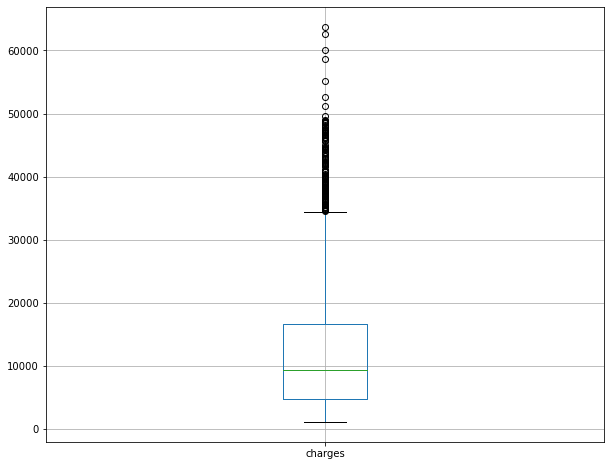

In [19]:
plt.figure(figsize = (10,8))

data.boxplot('charges')

plt.show()

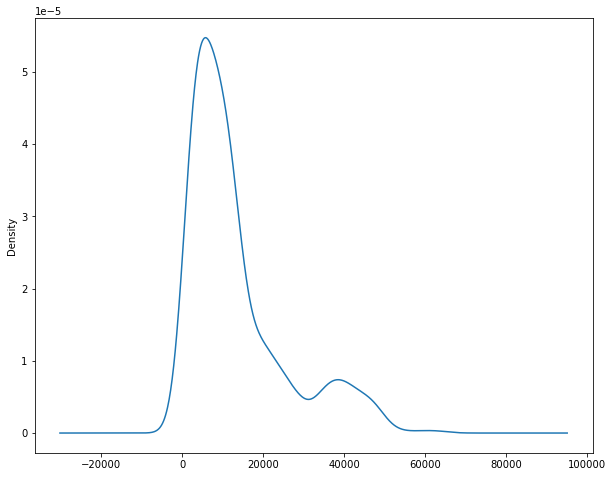

In [20]:
plt.figure(figsize = (10,8))

data['charges'].plot.kde()

plt.show()

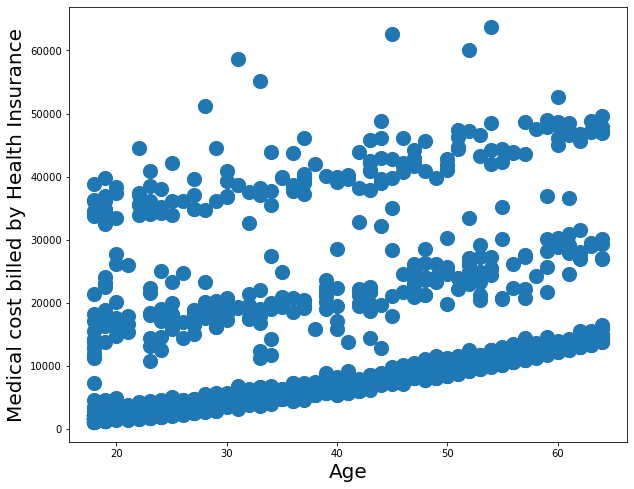

In [22]:
plt.figure(figsize = (10,8))

plt.scatter(data['age'], data['charges'], s = 200)

plt.xlabel('Age',fontsize = 20)
plt.ylabel('Medical cost billed by Health Insurance', fontsize = 20)
plt.show()

In [31]:
features = data.drop('charges',1)
target = data[['charges']]

In [32]:
categorical_features = features[['sex','smoker','region']]
categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [33]:
numeric_features = features.drop(['sex','smoker','region'],1)
numeric_features.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [34]:
gender_dict = {'female':0, 'male':1}

categorical_features['sex'].replace(gender_dict, inplace = True)

categorical_features.head()

C:\Users\G ANIL\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,sex,smoker,region
0,0,yes,southwest
1,1,no,southeast
2,1,no,southeast
3,1,no,northwest
4,1,no,northwest


In [35]:
smoker_dict = {'no':0 , 'yes':1}

categorical_features['smoker'].replace(smoker_dict, inplace = True)

categorical_features.head()

C:\Users\G ANIL\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


In [36]:
categorical_features = pd.get_dummies(categorical_features, columns = ['region'])
categorical_features.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [37]:
numeric_features.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [39]:
sc = StandardScaler()

numeric_features = pd.DataFrame(sc.fit_transform(numeric_features), columns = numeric_features.columns,
                               index = numeric_features.index)

numeric_features.describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,4.945388e-17,3.364689e-17,3.335648e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


In [42]:
processed_features = pd.concat([numeric_features, categorical_features], axis = 1, sort = False)

processed_features.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0


In [43]:
processed_data = pd.concat([processed_features, target], axis = 1, sort = False)

processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [46]:
processed_data.to_csv("C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/insurance_processed.csv ",
                      index = False)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(processed_features, target, test_size = 0.2, random_state = 1)

In [49]:
x_train.shape

(1070, 9)

In [50]:
x_test.shape

(268, 9)

In [53]:
def build_model():
    model = tf.keras.Sequential([layers.Dense(32, activation = 'relu', input_shape = [len(x_train.keys())]),
                                layers.Dense(64, activation = 'relu'),
                                layers.Dense(1)])
    optimizer = tf.keras.optimizers.Adam(lr = 0.001)
    
    model.compile(loss = 'mse', metrics = ['mae','mse'], optimizer = optimizer)
    
    return model

In [54]:
model_relu_64 = build_model()
model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [59]:
# keras.utils.plot_model(model_relu_64,'model_relu_64.png',show_shapes = True)

In [60]:
!ls *.png

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [61]:
n_epochs = 1000

training_hist = model_relu_64.fit(x_train,y_train,epochs = n_epochs,
                                 validation_split = 0.2, verbose = True)

Epoch 1/1000
27/27 [==============================] - 0s 18ms/step - loss: 317062816.0000 - mae: 13317.7676 - mse: 317062816.0000 - val_loss: 336109504.0000 - val_mae: 12876.9814 - val_mse: 336109504.0000
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 317017792.0000 - mae: 13316.1191 - mse: 317017792.0000 - val_loss: 336046336.0000 - val_mae: 12874.5674 - val_mse: 336046336.0000
Epoch 3/1000
27/27 [==============================] - 0s 4ms/step - loss: 316919968.0000 - mae: 13312.6201 - mse: 316919968.0000 - val_loss: 335896896.0000 - val_mae: 12869.0928 - val_mse: 335896896.0000
Epoch 4/1000
27/27 [==============================] - 0s 5ms/step - loss: 316696608.0000 - mae: 13304.9150 - mse: 316696608.0000 - val_loss: 335576960.0000 - val_mae: 12857.7773 - val_mse: 335576960.0000
Epoch 5/1000
27/27 [==============================] - 0s 5ms/step - loss: 316272800.0000 - mae: 13290.3018 - mse: 316272800.0000 - val_loss: 334993088.0000 - val_mae: 12837.6377 - val

27/27 [==============================] - 0s 4ms/step - loss: 91090608.0000 - mae: 7157.7891 - mse: 91090608.0000 - val_loss: 104447224.0000 - val_mae: 7858.0146 - val_mse: 104447224.0000
Epoch 42/1000
27/27 [==============================] - 0s 4ms/step - loss: 90080320.0000 - mae: 7155.0327 - mse: 90080320.0000 - val_loss: 103572320.0000 - val_mae: 7854.6548 - val_mse: 103572320.0000
Epoch 43/1000
27/27 [==============================] - 0s 4ms/step - loss: 89177592.0000 - mae: 7149.1836 - mse: 89177592.0000 - val_loss: 102730064.0000 - val_mae: 7852.2402 - val_mse: 102730064.0000
Epoch 44/1000
27/27 [==============================] - 0s 4ms/step - loss: 88381280.0000 - mae: 7162.2314 - mse: 88381280.0000 - val_loss: 101886968.0000 - val_mae: 7866.4189 - val_mse: 101886968.0000
Epoch 45/1000
27/27 [==============================] - 0s 4ms/step - loss: 87514784.0000 - mae: 7155.5806 - mse: 87514784.0000 - val_loss: 101030784.0000 - val_mae: 7860.5933 - val_mse: 101030784.0000
Epoch 46/

27/27 [==============================] - 0s 4ms/step - loss: 60083936.0000 - mae: 6009.4429 - mse: 60083936.0000 - val_loss: 69136136.0000 - val_mae: 6531.3086 - val_mse: 69136136.0000
Epoch 83/1000
27/27 [==============================] - 0s 4ms/step - loss: 59348240.0000 - mae: 5973.0024 - mse: 59348240.0000 - val_loss: 68298760.0000 - val_mae: 6497.1406 - val_mse: 68298760.0000
Epoch 84/1000
27/27 [==============================] - 0s 4ms/step - loss: 58663576.0000 - mae: 5941.1094 - mse: 58663576.0000 - val_loss: 67406232.0000 - val_mae: 6451.9009 - val_mse: 67406232.0000
Epoch 85/1000
27/27 [==============================] - 0s 4ms/step - loss: 57989884.0000 - mae: 5914.9102 - mse: 57989884.0000 - val_loss: 66565440.0000 - val_mae: 6425.9712 - val_mse: 66565440.0000
Epoch 86/1000
27/27 [==============================] - 0s 5ms/step - loss: 57285312.0000 - mae: 5879.9297 - mse: 57285312.0000 - val_loss: 65718116.0000 - val_mae: 6382.5747 - val_mse: 65718116.0000
Epoch 87/1000
27/27

Epoch 123/1000
27/27 [==============================] - 0s 4ms/step - loss: 39175420.0000 - mae: 4713.3242 - mse: 39175420.0000 - val_loss: 41125764.0000 - val_mae: 4731.3081 - val_mse: 41125764.0000
Epoch 124/1000
27/27 [==============================] - 0s 4ms/step - loss: 38955100.0000 - mae: 4709.0894 - mse: 38955100.0000 - val_loss: 40764596.0000 - val_mae: 4706.4746 - val_mse: 40764596.0000
Epoch 125/1000
27/27 [==============================] - 0s 4ms/step - loss: 38751656.0000 - mae: 4683.5244 - mse: 38751656.0000 - val_loss: 40378732.0000 - val_mae: 4669.2896 - val_mse: 40378732.0000
Epoch 126/1000
27/27 [==============================] - 0s 4ms/step - loss: 38531720.0000 - mae: 4651.9565 - mse: 38531720.0000 - val_loss: 40073196.0000 - val_mae: 4628.6523 - val_mse: 40073196.0000
Epoch 127/1000
27/27 [==============================] - 0s 4ms/step - loss: 38363544.0000 - mae: 4617.9233 - mse: 38363544.0000 - val_loss: 39743348.0000 - val_mae: 4570.5107 - val_mse: 39743348.0000


Epoch 164/1000
27/27 [==============================] - 0s 4ms/step - loss: 35856036.0000 - mae: 4183.1572 - mse: 35856036.0000 - val_loss: 34209064.0000 - val_mae: 3962.6775 - val_mse: 34209064.0000
Epoch 165/1000
27/27 [==============================] - 0s 5ms/step - loss: 35824428.0000 - mae: 4172.5977 - mse: 35824428.0000 - val_loss: 34187060.0000 - val_mae: 3956.5515 - val_mse: 34187060.0000
Epoch 166/1000
27/27 [==============================] - 0s 4ms/step - loss: 35801752.0000 - mae: 4164.8862 - mse: 35801752.0000 - val_loss: 34104384.0000 - val_mae: 3943.5391 - val_mse: 34104384.0000
Epoch 167/1000
27/27 [==============================] - 0s 4ms/step - loss: 35766400.0000 - mae: 4161.6665 - mse: 35766400.0000 - val_loss: 34075204.0000 - val_mae: 3943.8716 - val_mse: 34075204.0000
Epoch 168/1000
27/27 [==============================] - 0s 4ms/step - loss: 35763284.0000 - mae: 4163.1240 - mse: 35763284.0000 - val_loss: 34037608.0000 - val_mae: 3943.9763 - val_mse: 34037608.0000


Epoch 205/1000
27/27 [==============================] - 0s 4ms/step - loss: 35117652.0000 - mae: 4088.1787 - mse: 35117652.0000 - val_loss: 32767290.0000 - val_mae: 3861.4573 - val_mse: 32767290.0000
Epoch 206/1000
27/27 [==============================] - 0s 4ms/step - loss: 35089124.0000 - mae: 4076.8640 - mse: 35089124.0000 - val_loss: 32760416.0000 - val_mae: 3842.0457 - val_mse: 32760416.0000
Epoch 207/1000
27/27 [==============================] - 0s 4ms/step - loss: 35066588.0000 - mae: 4071.9351 - mse: 35066588.0000 - val_loss: 32724954.0000 - val_mae: 3844.3674 - val_mse: 32724954.0000
Epoch 208/1000
27/27 [==============================] - 0s 4ms/step - loss: 35045844.0000 - mae: 4070.8782 - mse: 35045844.0000 - val_loss: 32692934.0000 - val_mae: 3843.7019 - val_mse: 32692934.0000
Epoch 209/1000
27/27 [==============================] - 0s 4ms/step - loss: 35052492.0000 - mae: 4063.0964 - mse: 35052492.0000 - val_loss: 32689750.0000 - val_mae: 3832.4177 - val_mse: 32689750.0000


Epoch 246/1000
27/27 [==============================] - 0s 4ms/step - loss: 34293864.0000 - mae: 4014.5659 - mse: 34293864.0000 - val_loss: 31777276.0000 - val_mae: 3793.0447 - val_mse: 31777276.0000
Epoch 247/1000
27/27 [==============================] - 0s 4ms/step - loss: 34291124.0000 - mae: 4008.6106 - mse: 34291124.0000 - val_loss: 31771582.0000 - val_mae: 3788.4417 - val_mse: 31771582.0000
Epoch 248/1000
27/27 [==============================] - 0s 4ms/step - loss: 34224332.0000 - mae: 4009.7026 - mse: 34224332.0000 - val_loss: 31727850.0000 - val_mae: 3788.1631 - val_mse: 31727848.0000
Epoch 249/1000
27/27 [==============================] - 0s 4ms/step - loss: 34215268.0000 - mae: 4022.0713 - mse: 34215268.0000 - val_loss: 31685912.0000 - val_mae: 3797.3269 - val_mse: 31685912.0000
Epoch 250/1000
27/27 [==============================] - 0s 4ms/step - loss: 34189188.0000 - mae: 4007.1208 - mse: 34189188.0000 - val_loss: 31687550.0000 - val_mae: 3775.0432 - val_mse: 31687550.0000


Epoch 287/1000
27/27 [==============================] - 0s 4ms/step - loss: 32833632.0000 - mae: 3872.0149 - mse: 32833632.0000 - val_loss: 30516074.0000 - val_mae: 3651.2490 - val_mse: 30516070.0000
Epoch 288/1000
27/27 [==============================] - 0s 4ms/step - loss: 32788032.0000 - mae: 3878.1372 - mse: 32788032.0000 - val_loss: 30472010.0000 - val_mae: 3654.8105 - val_mse: 30472010.0000
Epoch 289/1000
27/27 [==============================] - 0s 4ms/step - loss: 32733162.0000 - mae: 3868.8552 - mse: 32733162.0000 - val_loss: 30461206.0000 - val_mae: 3647.8269 - val_mse: 30461206.0000
Epoch 290/1000
27/27 [==============================] - 0s 4ms/step - loss: 32686692.0000 - mae: 3862.3677 - mse: 32686692.0000 - val_loss: 30420662.0000 - val_mae: 3645.4702 - val_mse: 30420662.0000
Epoch 291/1000
27/27 [==============================] - 0s 4ms/step - loss: 32653256.0000 - mae: 3866.8916 - mse: 32653256.0000 - val_loss: 30374864.0000 - val_mae: 3651.4915 - val_mse: 30374864.0000


Epoch 328/1000
27/27 [==============================] - 0s 3ms/step - loss: 30916778.0000 - mae: 3692.4758 - mse: 30916778.0000 - val_loss: 29122790.0000 - val_mae: 3481.8076 - val_mse: 29122790.0000
Epoch 329/1000
27/27 [==============================] - 0s 4ms/step - loss: 30874088.0000 - mae: 3689.0183 - mse: 30874088.0000 - val_loss: 29114698.0000 - val_mae: 3477.5281 - val_mse: 29114698.0000
Epoch 330/1000
27/27 [==============================] - 0s 4ms/step - loss: 30857250.0000 - mae: 3675.3232 - mse: 30857250.0000 - val_loss: 29094994.0000 - val_mae: 3467.8616 - val_mse: 29094994.0000
Epoch 331/1000
27/27 [==============================] - 0s 4ms/step - loss: 30777392.0000 - mae: 3682.0938 - mse: 30777392.0000 - val_loss: 29042880.0000 - val_mae: 3474.1086 - val_mse: 29042880.0000
Epoch 332/1000
27/27 [==============================] - 0s 4ms/step - loss: 30733970.0000 - mae: 3675.7947 - mse: 30733970.0000 - val_loss: 28997684.0000 - val_mae: 3465.5269 - val_mse: 28997684.0000


Epoch 369/1000
27/27 [==============================] - 0s 4ms/step - loss: 28965100.0000 - mae: 3518.8262 - mse: 28965100.0000 - val_loss: 27730152.0000 - val_mae: 3322.6016 - val_mse: 27730152.0000
Epoch 370/1000
27/27 [==============================] - 0s 4ms/step - loss: 28917130.0000 - mae: 3508.3093 - mse: 28917130.0000 - val_loss: 27677624.0000 - val_mae: 3322.6282 - val_mse: 27677624.0000
Epoch 371/1000
27/27 [==============================] - 0s 4ms/step - loss: 28850684.0000 - mae: 3504.4734 - mse: 28850684.0000 - val_loss: 27666538.0000 - val_mae: 3312.7927 - val_mse: 27666538.0000
Epoch 372/1000
27/27 [==============================] - 0s 4ms/step - loss: 28801056.0000 - mae: 3492.0249 - mse: 28801056.0000 - val_loss: 27608872.0000 - val_mae: 3301.3909 - val_mse: 27608872.0000
Epoch 373/1000
27/27 [==============================] - 0s 4ms/step - loss: 28768344.0000 - mae: 3495.0586 - mse: 28768344.0000 - val_loss: 27567632.0000 - val_mae: 3303.7952 - val_mse: 27567632.0000


Epoch 410/1000
27/27 [==============================] - 0s 4ms/step - loss: 26964810.0000 - mae: 3317.5801 - mse: 26964810.0000 - val_loss: 26287882.0000 - val_mae: 3155.8574 - val_mse: 26287882.0000
Epoch 411/1000
27/27 [==============================] - 0s 4ms/step - loss: 26921584.0000 - mae: 3322.2832 - mse: 26921584.0000 - val_loss: 26238718.0000 - val_mae: 3154.1890 - val_mse: 26238718.0000
Epoch 412/1000
27/27 [==============================] - 0s 4ms/step - loss: 26862870.0000 - mae: 3316.0420 - mse: 26862870.0000 - val_loss: 26207716.0000 - val_mae: 3150.9722 - val_mse: 26207716.0000
Epoch 413/1000
27/27 [==============================] - 0s 4ms/step - loss: 26833916.0000 - mae: 3316.1821 - mse: 26833916.0000 - val_loss: 26158290.0000 - val_mae: 3148.7869 - val_mse: 26158290.0000
Epoch 414/1000
27/27 [==============================] - 0s 4ms/step - loss: 26795552.0000 - mae: 3285.3999 - mse: 26795552.0000 - val_loss: 26097818.0000 - val_mae: 3118.5972 - val_mse: 26097818.0000


Epoch 451/1000
27/27 [==============================] - 0s 5ms/step - loss: 25096960.0000 - mae: 3144.7192 - mse: 25096960.0000 - val_loss: 24767338.0000 - val_mae: 2991.8726 - val_mse: 24767338.0000
Epoch 452/1000
27/27 [==============================] - 0s 5ms/step - loss: 25049568.0000 - mae: 3147.1384 - mse: 25049568.0000 - val_loss: 24731504.0000 - val_mae: 2986.3516 - val_mse: 24731504.0000
Epoch 453/1000
27/27 [==============================] - 0s 6ms/step - loss: 25022570.0000 - mae: 3120.8193 - mse: 25022570.0000 - val_loss: 24671882.0000 - val_mae: 2969.3943 - val_mse: 24671882.0000
Epoch 454/1000
27/27 [==============================] - 0s 4ms/step - loss: 24960154.0000 - mae: 3128.5132 - mse: 24960154.0000 - val_loss: 24647106.0000 - val_mae: 2974.2673 - val_mse: 24647106.0000
Epoch 455/1000
27/27 [==============================] - 0s 4ms/step - loss: 24910216.0000 - mae: 3135.4966 - mse: 24910216.0000 - val_loss: 24613120.0000 - val_mae: 2975.1846 - val_mse: 24613120.0000


Epoch 492/1000
27/27 [==============================] - 0s 5ms/step - loss: 23636808.0000 - mae: 3025.7625 - mse: 23636808.0000 - val_loss: 23588954.0000 - val_mae: 2844.4124 - val_mse: 23588954.0000
Epoch 493/1000
27/27 [==============================] - 0s 4ms/step - loss: 23631326.0000 - mae: 2984.0427 - mse: 23631326.0000 - val_loss: 23553244.0000 - val_mae: 2833.6074 - val_mse: 23553244.0000
Epoch 494/1000
27/27 [==============================] - 0s 4ms/step - loss: 23599614.0000 - mae: 3004.4270 - mse: 23599614.0000 - val_loss: 23563730.0000 - val_mae: 2844.9019 - val_mse: 23563730.0000
Epoch 495/1000
27/27 [==============================] - 0s 3ms/step - loss: 23554886.0000 - mae: 2987.8003 - mse: 23554886.0000 - val_loss: 23509518.0000 - val_mae: 2832.3882 - val_mse: 23509518.0000
Epoch 496/1000
27/27 [==============================] - 0s 4ms/step - loss: 23537010.0000 - mae: 2990.5208 - mse: 23537010.0000 - val_loss: 23514834.0000 - val_mae: 2850.2739 - val_mse: 23514834.0000


Epoch 533/1000
27/27 [==============================] - 0s 4ms/step - loss: 22691928.0000 - mae: 2889.7480 - mse: 22691928.0000 - val_loss: 22907124.0000 - val_mae: 2801.6799 - val_mse: 22907124.0000
Epoch 534/1000
27/27 [==============================] - 0s 4ms/step - loss: 22675294.0000 - mae: 2908.9534 - mse: 22675294.0000 - val_loss: 22898284.0000 - val_mae: 2793.0012 - val_mse: 22898284.0000
Epoch 535/1000
27/27 [==============================] - 0s 4ms/step - loss: 22649328.0000 - mae: 2901.7617 - mse: 22649328.0000 - val_loss: 22878968.0000 - val_mae: 2792.3889 - val_mse: 22878968.0000
Epoch 536/1000
27/27 [==============================] - 0s 4ms/step - loss: 22664326.0000 - mae: 2917.1902 - mse: 22664326.0000 - val_loss: 22944170.0000 - val_mae: 2824.1467 - val_mse: 22944170.0000
Epoch 537/1000
27/27 [==============================] - 0s 4ms/step - loss: 22618904.0000 - mae: 2883.9001 - mse: 22618904.0000 - val_loss: 22819262.0000 - val_mae: 2771.4375 - val_mse: 22819262.0000


Epoch 574/1000
27/27 [==============================] - 0s 4ms/step - loss: 22032716.0000 - mae: 2815.4895 - mse: 22032716.0000 - val_loss: 22613920.0000 - val_mae: 2751.9062 - val_mse: 22613920.0000
Epoch 575/1000
27/27 [==============================] - 0s 4ms/step - loss: 22005904.0000 - mae: 2798.7544 - mse: 22005904.0000 - val_loss: 22629836.0000 - val_mae: 2753.4153 - val_mse: 22629836.0000
Epoch 576/1000
27/27 [==============================] - 0s 4ms/step - loss: 22012280.0000 - mae: 2853.6143 - mse: 22012280.0000 - val_loss: 22670700.0000 - val_mae: 2780.4124 - val_mse: 22670700.0000
Epoch 577/1000
27/27 [==============================] - 0s 4ms/step - loss: 21969964.0000 - mae: 2815.2256 - mse: 21969964.0000 - val_loss: 22609290.0000 - val_mae: 2750.9038 - val_mse: 22609294.0000
Epoch 578/1000
27/27 [==============================] - 0s 4ms/step - loss: 21974674.0000 - mae: 2785.4421 - mse: 21974674.0000 - val_loss: 22544934.0000 - val_mae: 2717.0315 - val_mse: 22544934.0000


Epoch 615/1000
27/27 [==============================] - 0s 4ms/step - loss: 21535510.0000 - mae: 2771.7854 - mse: 21535510.0000 - val_loss: 22496756.0000 - val_mae: 2737.7432 - val_mse: 22496756.0000
Epoch 616/1000
27/27 [==============================] - 0s 4ms/step - loss: 21519456.0000 - mae: 2786.4482 - mse: 21519456.0000 - val_loss: 22507016.0000 - val_mae: 2743.2734 - val_mse: 22507016.0000
Epoch 617/1000
27/27 [==============================] - 0s 4ms/step - loss: 21497504.0000 - mae: 2788.1782 - mse: 21497504.0000 - val_loss: 22505932.0000 - val_mae: 2744.0791 - val_mse: 22505932.0000
Epoch 618/1000
27/27 [==============================] - 0s 4ms/step - loss: 21498918.0000 - mae: 2756.3650 - mse: 21498918.0000 - val_loss: 22457126.0000 - val_mae: 2724.0100 - val_mse: 22457126.0000
Epoch 619/1000
27/27 [==============================] - 0s 4ms/step - loss: 21516454.0000 - mae: 2733.2754 - mse: 21516454.0000 - val_loss: 22400508.0000 - val_mae: 2698.7458 - val_mse: 22400508.0000


Epoch 656/1000
27/27 [==============================] - 0s 4ms/step - loss: 21196924.0000 - mae: 2746.6396 - mse: 21196924.0000 - val_loss: 22405924.0000 - val_mae: 2763.9868 - val_mse: 22405924.0000
Epoch 657/1000
27/27 [==============================] - 0s 4ms/step - loss: 21199188.0000 - mae: 2737.1472 - mse: 21199188.0000 - val_loss: 22279536.0000 - val_mae: 2714.5088 - val_mse: 22279536.0000
Epoch 658/1000
27/27 [==============================] - 0s 4ms/step - loss: 21185630.0000 - mae: 2724.0933 - mse: 21185630.0000 - val_loss: 22272120.0000 - val_mae: 2715.3633 - val_mse: 22272120.0000
Epoch 659/1000
27/27 [==============================] - 0s 4ms/step - loss: 21195796.0000 - mae: 2757.6848 - mse: 21195796.0000 - val_loss: 22389304.0000 - val_mae: 2761.6082 - val_mse: 22389300.0000
Epoch 660/1000
27/27 [==============================] - 0s 4ms/step - loss: 21184362.0000 - mae: 2739.2446 - mse: 21184362.0000 - val_loss: 22297372.0000 - val_mae: 2729.2229 - val_mse: 22297372.0000


Epoch 697/1000
27/27 [==============================] - 0s 4ms/step - loss: 20935214.0000 - mae: 2756.7966 - mse: 20935214.0000 - val_loss: 22219384.0000 - val_mae: 2752.3889 - val_mse: 22219384.0000
Epoch 698/1000
27/27 [==============================] - 0s 4ms/step - loss: 20939680.0000 - mae: 2720.7173 - mse: 20939680.0000 - val_loss: 22109858.0000 - val_mae: 2704.9619 - val_mse: 22109858.0000
Epoch 699/1000
27/27 [==============================] - 0s 4ms/step - loss: 20945758.0000 - mae: 2707.3630 - mse: 20945758.0000 - val_loss: 22147732.0000 - val_mae: 2720.3828 - val_mse: 22147732.0000
Epoch 700/1000
27/27 [==============================] - 0s 4ms/step - loss: 20923134.0000 - mae: 2735.4893 - mse: 20923134.0000 - val_loss: 22146296.0000 - val_mae: 2725.9919 - val_mse: 22146296.0000
Epoch 701/1000
27/27 [==============================] - 0s 4ms/step - loss: 20915642.0000 - mae: 2715.5991 - mse: 20915642.0000 - val_loss: 22104222.0000 - val_mae: 2710.8611 - val_mse: 22104222.0000


Epoch 738/1000
27/27 [==============================] - 0s 4ms/step - loss: 20752490.0000 - mae: 2686.4053 - mse: 20752490.0000 - val_loss: 21956330.0000 - val_mae: 2686.7957 - val_mse: 21956330.0000
Epoch 739/1000
27/27 [==============================] - 0s 4ms/step - loss: 20769708.0000 - mae: 2734.2390 - mse: 20769708.0000 - val_loss: 22077622.0000 - val_mae: 2736.8093 - val_mse: 22077622.0000
Epoch 740/1000
27/27 [==============================] - 0s 4ms/step - loss: 20744900.0000 - mae: 2679.2175 - mse: 20744900.0000 - val_loss: 21915872.0000 - val_mae: 2673.3384 - val_mse: 21915872.0000
Epoch 741/1000
27/27 [==============================] - 0s 4ms/step - loss: 20727678.0000 - mae: 2684.2468 - mse: 20727678.0000 - val_loss: 22026426.0000 - val_mae: 2722.2722 - val_mse: 22026426.0000
Epoch 742/1000
27/27 [==============================] - 0s 4ms/step - loss: 20724642.0000 - mae: 2696.6829 - mse: 20724642.0000 - val_loss: 21982274.0000 - val_mae: 2708.3481 - val_mse: 21982272.0000


Epoch 779/1000
27/27 [==============================] - 0s 4ms/step - loss: 20596910.0000 - mae: 2660.9624 - mse: 20596910.0000 - val_loss: 21906020.0000 - val_mae: 2697.2217 - val_mse: 21906020.0000
Epoch 780/1000
27/27 [==============================] - 0s 5ms/step - loss: 20594202.0000 - mae: 2697.8469 - mse: 20594202.0000 - val_loss: 21864952.0000 - val_mae: 2686.8145 - val_mse: 21864952.0000
Epoch 781/1000
27/27 [==============================] - 0s 4ms/step - loss: 20586094.0000 - mae: 2693.3865 - mse: 20586094.0000 - val_loss: 21892958.0000 - val_mae: 2702.1672 - val_mse: 21892958.0000
Epoch 782/1000
27/27 [==============================] - 0s 4ms/step - loss: 20572904.0000 - mae: 2685.6282 - mse: 20572904.0000 - val_loss: 21878880.0000 - val_mae: 2692.1187 - val_mse: 21878880.0000
Epoch 783/1000
27/27 [==============================] - 0s 4ms/step - loss: 20576988.0000 - mae: 2701.9856 - mse: 20576988.0000 - val_loss: 21941478.0000 - val_mae: 2714.5896 - val_mse: 21941478.0000


Epoch 820/1000
27/27 [==============================] - 0s 4ms/step - loss: 20456606.0000 - mae: 2651.2861 - mse: 20456606.0000 - val_loss: 21842222.0000 - val_mae: 2689.1367 - val_mse: 21842222.0000
Epoch 821/1000
27/27 [==============================] - 0s 4ms/step - loss: 20450528.0000 - mae: 2682.6582 - mse: 20450528.0000 - val_loss: 21980802.0000 - val_mae: 2736.9351 - val_mse: 21980804.0000
Epoch 822/1000
27/27 [==============================] - 0s 4ms/step - loss: 20448732.0000 - mae: 2679.3984 - mse: 20448732.0000 - val_loss: 21849720.0000 - val_mae: 2690.2412 - val_mse: 21849720.0000
Epoch 823/1000
27/27 [==============================] - 0s 4ms/step - loss: 20456036.0000 - mae: 2657.4856 - mse: 20456036.0000 - val_loss: 21779164.0000 - val_mae: 2665.9673 - val_mse: 21779164.0000
Epoch 824/1000
27/27 [==============================] - 0s 4ms/step - loss: 20448240.0000 - mae: 2679.5645 - mse: 20448240.0000 - val_loss: 21922526.0000 - val_mae: 2718.1978 - val_mse: 21922526.0000


Epoch 861/1000
27/27 [==============================] - 0s 4ms/step - loss: 20335376.0000 - mae: 2644.9380 - mse: 20335376.0000 - val_loss: 21765986.0000 - val_mae: 2679.9287 - val_mse: 21765986.0000
Epoch 862/1000
27/27 [==============================] - 0s 4ms/step - loss: 20335490.0000 - mae: 2658.5461 - mse: 20335490.0000 - val_loss: 21779648.0000 - val_mae: 2682.4719 - val_mse: 21779648.0000
Epoch 863/1000
27/27 [==============================] - 0s 4ms/step - loss: 20354002.0000 - mae: 2678.8918 - mse: 20354002.0000 - val_loss: 21827412.0000 - val_mae: 2706.9626 - val_mse: 21827412.0000
Epoch 864/1000
27/27 [==============================] - 0s 4ms/step - loss: 20338504.0000 - mae: 2625.5471 - mse: 20338504.0000 - val_loss: 21726004.0000 - val_mae: 2660.7236 - val_mse: 21726002.0000
Epoch 865/1000
27/27 [==============================] - 0s 4ms/step - loss: 20335836.0000 - mae: 2650.9729 - mse: 20335836.0000 - val_loss: 21774446.0000 - val_mae: 2683.5217 - val_mse: 21774446.0000


Epoch 902/1000
27/27 [==============================] - 0s 4ms/step - loss: 20242764.0000 - mae: 2610.6423 - mse: 20242764.0000 - val_loss: 21614730.0000 - val_mae: 2639.3220 - val_mse: 21614730.0000
Epoch 903/1000
27/27 [==============================] - 0s 4ms/step - loss: 20245920.0000 - mae: 2638.3525 - mse: 20245920.0000 - val_loss: 21720580.0000 - val_mae: 2683.7461 - val_mse: 21720580.0000
Epoch 904/1000
27/27 [==============================] - 0s 4ms/step - loss: 20242878.0000 - mae: 2629.0764 - mse: 20242878.0000 - val_loss: 21621696.0000 - val_mae: 2651.8752 - val_mse: 21621696.0000
Epoch 905/1000
27/27 [==============================] - 0s 4ms/step - loss: 20234572.0000 - mae: 2655.9136 - mse: 20234572.0000 - val_loss: 21743664.0000 - val_mae: 2700.0640 - val_mse: 21743664.0000
Epoch 906/1000
27/27 [==============================] - 0s 4ms/step - loss: 20233468.0000 - mae: 2628.2129 - mse: 20233468.0000 - val_loss: 21683220.0000 - val_mae: 2673.2703 - val_mse: 21683220.0000


Epoch 943/1000
27/27 [==============================] - 0s 4ms/step - loss: 20152390.0000 - mae: 2648.2197 - mse: 20152390.0000 - val_loss: 21626112.0000 - val_mae: 2674.2139 - val_mse: 21626112.0000
Epoch 944/1000
27/27 [==============================] - 0s 4ms/step - loss: 20153662.0000 - mae: 2620.1487 - mse: 20153662.0000 - val_loss: 21678462.0000 - val_mae: 2691.0969 - val_mse: 21678462.0000
Epoch 945/1000
27/27 [==============================] - 0s 3ms/step - loss: 20149762.0000 - mae: 2638.7581 - mse: 20149762.0000 - val_loss: 21715200.0000 - val_mae: 2698.6174 - val_mse: 21715200.0000
Epoch 946/1000
27/27 [==============================] - 0s 4ms/step - loss: 20149320.0000 - mae: 2613.8721 - mse: 20149320.0000 - val_loss: 21618176.0000 - val_mae: 2663.6196 - val_mse: 21618176.0000
Epoch 947/1000
27/27 [==============================] - 0s 4ms/step - loss: 20141678.0000 - mae: 2602.2693 - mse: 20141678.0000 - val_loss: 21597984.0000 - val_mae: 2660.2378 - val_mse: 21597984.0000


Epoch 984/1000
27/27 [==============================] - 0s 4ms/step - loss: 20068820.0000 - mae: 2635.6448 - mse: 20068820.0000 - val_loss: 21684588.0000 - val_mae: 2707.2451 - val_mse: 21684588.0000
Epoch 985/1000
27/27 [==============================] - 0s 4ms/step - loss: 20070508.0000 - mae: 2652.6533 - mse: 20070508.0000 - val_loss: 21628760.0000 - val_mae: 2684.4924 - val_mse: 21628760.0000
Epoch 986/1000
27/27 [==============================] - 0s 3ms/step - loss: 20076474.0000 - mae: 2611.4192 - mse: 20076474.0000 - val_loss: 21607542.0000 - val_mae: 2677.2288 - val_mse: 21607542.0000
Epoch 987/1000
27/27 [==============================] - 0s 5ms/step - loss: 20067288.0000 - mae: 2597.1372 - mse: 20067288.0000 - val_loss: 21607420.0000 - val_mae: 2680.1985 - val_mse: 21607420.0000
Epoch 988/1000
27/27 [==============================] - 0s 3ms/step - loss: 20086476.0000 - mae: 2657.0488 - mse: 20086476.0000 - val_loss: 21733512.0000 - val_mae: 2725.7490 - val_mse: 21733512.0000


In [62]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,20056800.0,2630.563965,20056800.0,21567356.0,2668.220215,21567356.0,995
996,20049568.0,2596.274170,20049568.0,21552870.0,2664.281738,21552870.0,996
997,20076152.0,2673.687988,20076152.0,21756534.0,2731.434570,21756534.0,997
998,20051564.0,2645.488525,20051564.0,21579130.0,2672.781494,21579130.0,998
999,20060776.0,2595.373291,20060776.0,21483438.0,2634.064453,21483438.0,999


In [64]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std = 2)

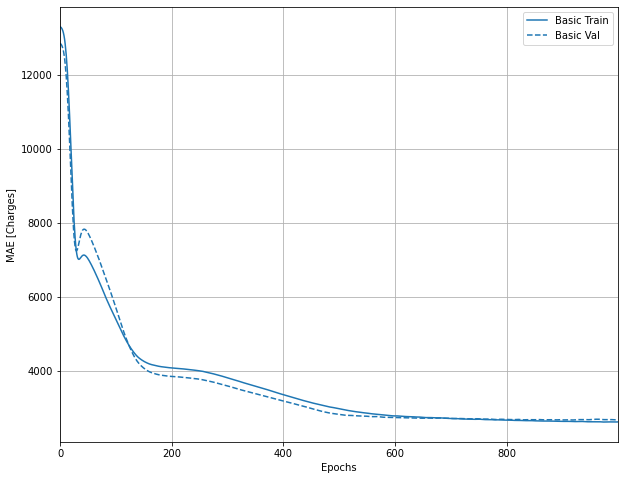

In [66]:
plt.figure(figsize = (10,8))

plotter.plot({"Basic":training_hist}, metric = 'mae')

plt.ylabel('MAE [Charges]')

plt.show()

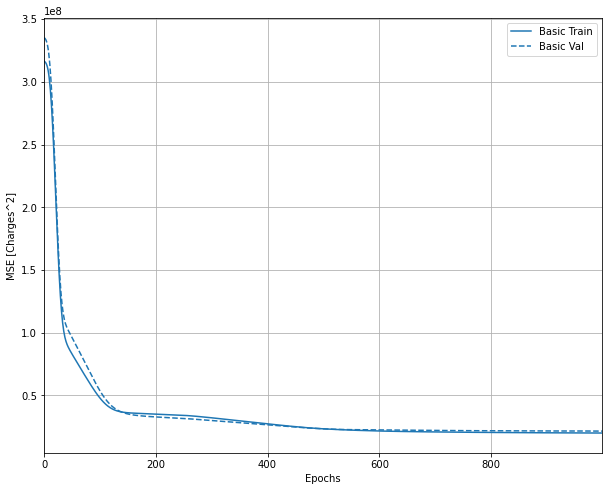

In [67]:
plt.figure(figsize = (10,8))

plotter.plot({'Basic':training_hist}, metric = 'mse')

plt.ylabel('MSE [Charges^2]')

plt.show()

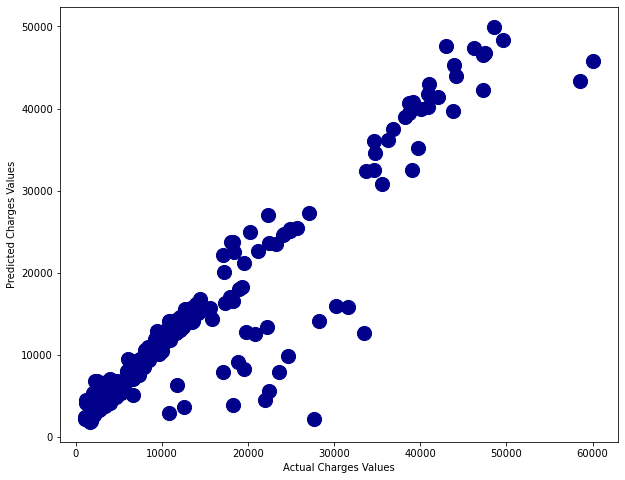

In [70]:
y_pred = model_relu_64.predict(x_test).flatten()

plt.figure(figsize = (10,8))

plt.scatter(y_test, y_pred, s=200, c = 'darkblue')

plt.xlabel('Actual Charges Values')
plt.ylabel('Predicted Charges Values')

plt.show()

In [71]:
r2_score(y_test, y_pred)

0.8745504552358639

* r2_score of our Regression model mearsures how much of the underlying variance has been capture by our model 

In [80]:
def build_model():
    
    model = tf.keras.Sequential([layers.Dense(32, activation = 'elu', input_shape =[len(x_train.keys())]),
                                layers.Dropout(0.2),
                                layers.Dense(64, activation = 'elu'),
                                layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.Adam(lr = 0.001)
    
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae','mse'])
    
    return model

**elu[Exponential Linear Unit Activation function]**: It converges Faster and Produce More Accurate Results

* It also mittigate the problem of saturation of neurons during training process by getting neurons to get operate in their active region

* The Dropout Layer Intentionally will turn off our neurons in our Dense layer during the training process. Thus forcing the active neurons in any iterartion to learn more from the data

  Ex: if mention layers.Dropout(0.2) means it will drop 20% of the neurons
  

* Dropout is used to mittigate the overfitting on your training data

In [81]:
model_elu_64 = build_model()
model_elu_64.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [82]:
# keras.utils.plot_model(model_relu_64,'model_relu_64.png',show_shapes = True)

In [83]:
n_epochs = 1000

training_hist = model_elu_64.fit(x_train,y_train,epochs = n_epochs,
                                 validation_split = 0.2, verbose = False,
                                callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317052032.0000,  mae:13317.6016,  mse:317052032.0000,  val_loss:336087296.0000,  val_mae:12876.6748,  val_mse:336087296.0000,  
....................................................................................................
Epoch: 100, loss:43557356.0000,  mae:4777.3384,  mse:43557356.0000,  val_loss:41663292.0000,  val_mae:4720.0415,  val_mse:41663292.0000,  
....................................................................................................
Epoch: 200, loss:33213362.0000,  mae:3851.1807,  mse:33213362.0000,  val_loss:24724054.0000,  val_mae:3098.9480,  val_mse:24724054.0000,  
....................................................................................................
Epoch: 300, loss:30852728.0000,  mae:3769.7693,  mse:30852728.0000,  val_loss:23915458.0000,  val_mae:2938.4690,  val_mse:23915458.0000,  
....................................................................................................
Epoch: 400, loss:30111012.0000,  ma

**Callback**: It is an Object passed to a model to extend it's behaviour during training, can use custom callbacks or built in callbacks in keras 

In [84]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,29886408.0,3533.186279,29886408.0,22415200.0,2690.854736,22415200.0,995
996,28740580.0,3455.138672,28740580.0,22448046.0,2712.357178,22448046.0,996
997,27991476.0,3461.266602,27991476.0,22422404.0,2696.963135,22422406.0,997
998,27631594.0,3435.797363,27631594.0,22411810.0,2701.959229,22411810.0,998
999,27549308.0,3403.343750,27549308.0,22352506.0,2687.225098,22352506.0,999


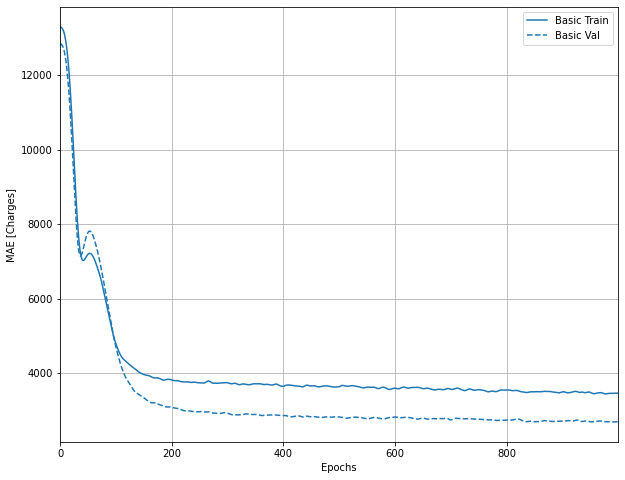

In [85]:
plt.figure(figsize = (10,8))

plotter.plot({"Basic":training_hist}, metric = 'mae')

plt.ylabel('MAE [Charges]')

plt.show()

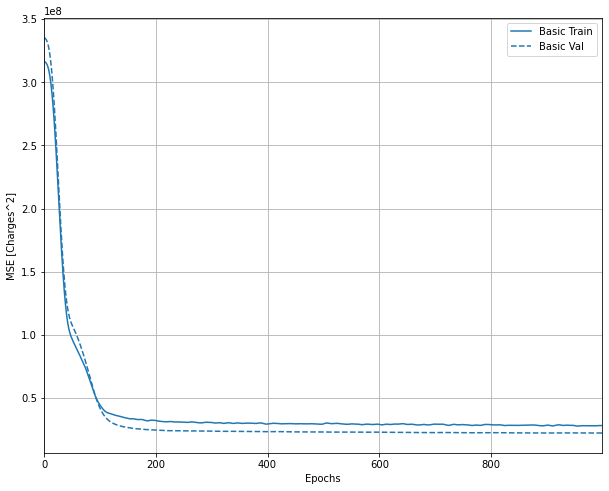

In [86]:
plt.figure(figsize = (10,8))

plotter.plot({'Basic':training_hist}, metric = 'mse')

plt.ylabel('MSE [Charges^2]')

plt.show()

In [87]:
model_elu_64.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 21751676.0000 - mae: 2780.2864 - mse: 21751676.0000


[21751676.0, 2780.286376953125, 21751676.0]

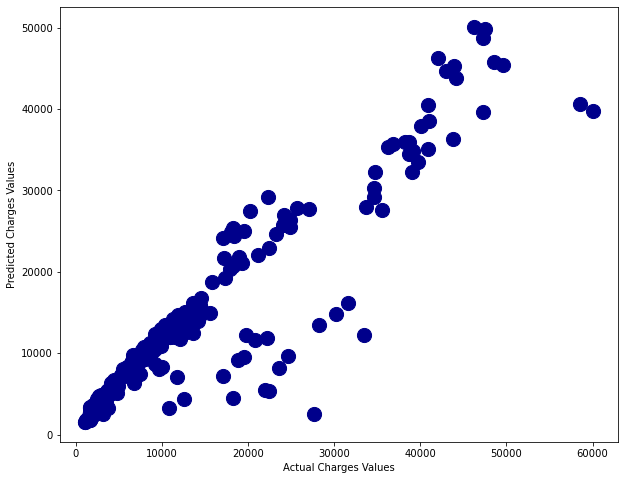

In [88]:
y_pred = model_elu_64.predict(x_test).flatten()

plt.figure(figsize = (10,8))

plt.scatter(y_test, y_pred, s=200, c = 'darkblue')

plt.xlabel('Actual Charges Values')
plt.ylabel('Predicted Charges Values')

plt.show()

In [89]:
r2_score(y_test, y_pred)

0.854290035220768

In [91]:
model_relu_with_ES  = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

training_history = model_relu_with_ES.fit(x_train, y_train, epochs = n_epochs, validation_split = 0.2, verbose = False,
                                         callbacks = [early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317058880.0000,  mae:13317.7930,  mse:317058880.0000,  val_loss:336094624.0000,  val_mae:12876.9160,  val_mse:336094624.0000,  
....................................................................................................
Epoch: 100, loss:40810220.0000,  mae:4609.8569,  mse:40810220.0000,  val_loss:35477672.0000,  val_mae:4229.5068,  val_mse:35477672.0000,  
................................................................................................

**EarlyStop**: It will interrupt training when the validation performance has stopped improving

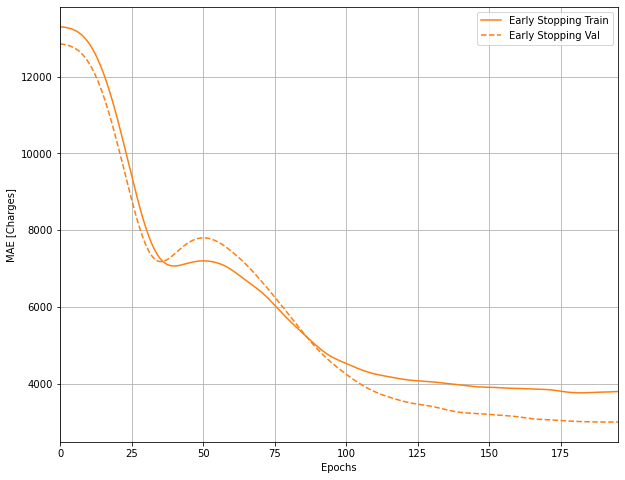

In [92]:
plt.figure(figsize = (10,8))

plotter.plot({'Early Stopping': training_history}, metric = 'mae')

plt.ylabel('MAE [Charges]')

plt.show()

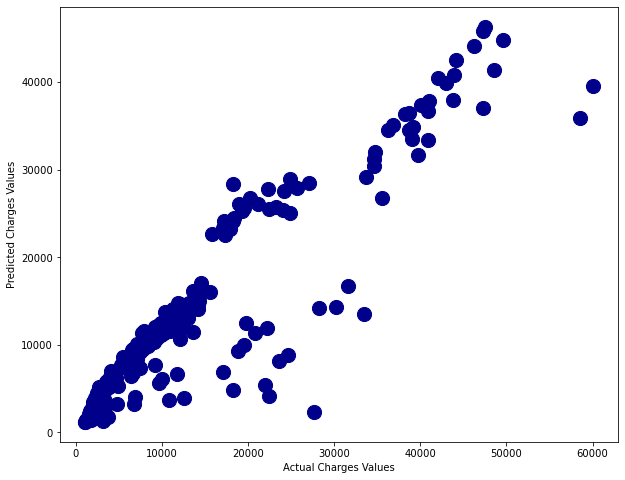

In [93]:
y_pred = model_relu_with_ES.predict(x_test).flatten()

plt.figure(figsize = (10,8))

plt.scatter(y_test,y_pred, s=200, c = 'darkblue')

plt.xlabel('Actual Charges Values')
plt.ylabel('Predicted Charges Values')
plt.show()

In [94]:
r2_score(y_test, y_pred)

0.8365388574894744

In [95]:
model_relu_with_ES.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [96]:
model_relu_with_ES.save_weights("C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/relu_64_weights")

* Save the model Parameters to files using the TensorFlow Checkpoint Format

* Checkpoints include one or more shards which contain trained weights and an index file that indicates which weights are prasent in which shard

In [97]:
!ls Part II/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [98]:
model_relu_with_ES.save_weights("C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/relu_64_weights.h5",
                                save_format = 'h5')

* Model weights can also be stored in Hierarchical Data Format(HDF) which is designed to store and organize large amounts of data - light weight alternative to the saved model format


* If you have number of complex layers in your model then better to use HDF format to process easily.

In [99]:
relu_64_json = model_relu_with_ES.to_json()

pprint.pprint(json.loads(relu_64_json))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'InputLayer',
                        'config': {'batch_input_shape': [None, 9],
                                   'dtype': 'float32',
                                   'name': 'dense_14_input',
                                   'ragged': False,
                                   'sparse': False}},
                       {'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 9],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_

In [101]:
with open("C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/relu_64_config.json", 'w') as outfile:
    
    outfile.write(relu_64_json)

In [102]:
!cat C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/relu_64_config.json

'cat' is not recognized as an internal or external command,
operable program or batch file.


**Note**: Saving the model architeture and model weights in separte is clunky. The best way to save model is entire model to single aircaft, the Architecture, weights, compile information, optimizer and state

In [103]:
model_relu_with_ES.save("C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/relu_64_config_weights")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/relu_64_config_weights\assets


* The TensorFlow saved model format. the model architeture and training configaration are in saved_model.pb, the weights of the model are stored in the variables/directory